In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import eazy
from glob import glob
print('EAZYCODE = ' + os.getenv('EAZYCODE'))

EAZYCODE = /Users/Vince.ec/python_git_downloads/eazy-py/eazy-photoz/


In [2]:
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all = 'ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

In [3]:
Adb = pd.read_pickle('/Users/Vince.ec/GitHub/Cluster_and_field/dataframes/fitdb/evolution_db_masslim.pkl')


In [15]:
params={}

params['VERBOSITY']                 =1.0
params['FILTERS_RES']               =os.getenv('EAZYCODE') + 'filters/FILTER.RES.latest'
params['FILTER_FORMAT']             =1.0
params['SMOOTH_FILTERS']            ='n'
params['SMOOTH_SIGMA']              =100.0
params['TEMPLATES_FILE']            =os.getenv('EAZYCODE') + 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'
params['TEMPLATE_COMBOS']           ='a'
params['NMF_TOLERANCE']             =0.0001
params['WAVELENGTH_FILE']           =os.getenv('EAZYCODE') + 'templates/uvista_nmf/lambda.def'
params['TEMP_ERR_FILE']             =os.getenv('EAZYCODE') + 'templates/uvista_nmf/template_error_10.def'
params['TEMP_ERR_A2']               =0.5
params['SYS_ERR']                   =0.02
params['APPLY_IGM']                 ='y'
params['SCALE_2175_BUMP']           =0.0
params['MW_EBV']                    =0.0103
params['CAT_HAS_EXTCORR']           ='y'
params['DUMP_TEMPLATE_CACHE']       ='n'
params['USE_TEMPLATE_CACHE']        ='n'
params['CACHE_FILE']                ='photz.tempfilt'
params['CATALOG_FILE']              ='/Volumes/Vince_CLEAR/3dhst_V4.4/goodsn_3dhst.v4.4.cats/Catalog/goodsn_3dhst.v4.4.cat'
# params['CATALOG_FILE']              ='/Users/Vince.ec/Downloads/goodss_3dhst.v4.5.cat'
params['MAGNITUDES']                ='n'
params['NOT_OBS_THRESHOLD']         =-90.0
params['N_MIN_COLORS']              =5.0
params['OUTPUT_DIRECTORY']          ='/Volumes/Vince_CLEAR/eazy_test/'
params['MAIN_OUTPUT_FILE']          ='/Volumes/Vince_CLEAR/eazy_test/goodsn_3dhst.v4.5'
params['PRINT_ERRORS']              ='y'
params['CHI2_SCALE']                =1.0
params['VERBOSE_LOG']               ='y'
params['OBS_SED_FILE']              ='n'
params['TEMP_SED_FILE']             ='n'
params['POFZ_FILE']                 ='n'
params['BINARY_OUTPUT']             ='y'
params['APPLY_PRIOR']               ='y'
params['PRIOR_FILE']                =os.getenv('EAZYCODE') + 'templates/prior_F160W_TAO.dat'
params['PRIOR_FILTER']              =205
params['PRIOR_ABZP']                =25.0
params['PRIOR_FLOOR']               =0.01
params['FIX_ZSPEC']                 =False
params['Z_MIN']                     =0.01
params['Z_MAX']                     =6.0
params['Z_STEP']                    =0.01
params['Z_STEP_TYPE']               =1.0
params['GET_ZP_OFFSETS']            ='n'
params['ZP_OFFSET_TOL']             =0.0001
params['REST_FILTERS']              ='---'
params['RF_PADDING']                =1000.0
params['RF_ERRORS']                 ='n'
params['Z_COLUMN']                  ='z_peak'
# params['Z_COLUMN']                  ='zbest'

params['USE_ZSPEC_FOR_REST']        ='y'
params['READ_ZBIN']                 ='n'
params['H0']                        =70.0
params['OMEGA_M']                   =0.3
params['OMEGA_L']                   =0.7

In [16]:
translate_file = '/Volumes/Vince_CLEAR/3dhst_V4.4/goodsn_3dhst.v4.4.cats/Eazy/goodsn_3dhst.v4.4.zphot.translate'

os.chdir(os.getenv('EAZYCODE'))

# self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
#                           params=params, load_prior=True, load_products=False)

EZrun = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=True, load_products=False)

Read default param file: /Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: /Volumes/Vince_CLEAR/3dhst_V4.4/goodsn_3dhst.v4.4.cats/Catalog/goodsn_3dhst.v4.4.cat
   >>> NOBJ = 39005
f_F160W e_F160W (205): hst/wfc3/IR/f160w.dat
f_U e_U (227): NOAO/k1001bp_jul04.txt
f_F435W e_F435W (233): hst/ACS_update_sep07/wfc_f435w_t81.dat
f_G e_G (229): LRIS/g_blue_transmission.dat
f_F606W e_F606W (236): hst/ACS_update_sep07/wfc_f606w_t81.dat
f_Rs e_Rs (231): LRIS/Rs_LRISred_transmission.dat
f_F775W e_F775W (238): hst/ACS_update_sep07/wfc_f775w_t81.dat
f_F850LP e_F850LP (240): hst/ACS_update_sep07/wfc_f850lp_t81.dat
f_F125W e_F125W (203): hst/wfc3/IR/f125w.dat
f_J e_J (224): MOIRCS/J277.txt
f_F140W e_F140W (204): hst/wfc3/IR/f140w.dat
f_H e_H (225): MOIRCS/H117.txt
f_Ks e_Ks (226): MOIRCS/Ks_rot1707wedged120K.txt
f_IRAC1 e_IRAC1 ( 18): IRAC/irac_tr1_2004-08-09.dat
f_IRAC2 e_IRAC2 ( 19): IRAC/irac_tr2_2004-08-09.dat
f_IRAC3 e_IRAC

100%|██████████| 12/12 [00:36<00:00,  3.06s/it]
0it [00:00, ?it/s]

Template   0: tweak_fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: tweak_fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: tweak_fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: tweak_fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: tweak_fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: tweak_fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: tweak_fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: tweak_fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: tweak_fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: tweak_fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: tweak_fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: tweak_fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 36.952 s


194it [00:08, 22.90it/s]


In [17]:
for i in Adb.query('field == "GND"').index:
    EZrun.cat[Adb.id[i]-1]['z_spec'] = Adb.zgrism[i]  
    print(EZrun.cat[Adb.id[i]-1]['z_spec'] , Adb.zgrism[i])
    

1.1386880389369576 1.1386880389369576
0.8036935681363329 0.8036935681363329
0.7839584712318939 0.7839584712318939
0.7785645030568895 0.7785645030568895
0.9416172969648031 0.9416172969648031
1.516815755548939 1.516815755548939
1.1517550514010444 1.1517550514010444
1.1492622914518007 1.1492622914518007
1.01623537173367 1.01623537173367
1.6255717336180115 1.6255717336180115
1.5884726373344975 1.5884726373344975
0.8580638349675758 0.8580638349675758
1.1328961231271204 1.1328961231271204
0.8600930838512661 0.8600930838512661
0.9687141142088838 0.9687141142088838
1.136402169801961 1.136402169801961
1.2518594305069397 1.2518594305069397
0.9378601711854082 0.9378601711854082
0.9384001935490498 0.9384001935490498
0.855498760081092 0.855498760081092
1.1411016207505522 1.1411016207505522
0.9814005356293015 0.9814005356293015
1.3621617463781455 1.3621617463781455
1.2235590627308373 1.2235590627308373
1.5981974296432533 1.5981974296432533
0.9416773144789368 0.9416773144789368
0.9551036557014592 0.9

In [18]:
EZrun.cat['zspec'] = EZrun.cat['z_spec']

In [19]:
EZrun.fit_parallel(prior=False, beta_prior=False)

100%|██████████| 194/194 [15:00<00:00,  4.64s/it]


Compute best fits
fit_best: 9.1 s (n_proc=2,  NOBJ=35626)
Fit 911.9 s (n_proc=4, NOBJ=39005)


Iteration:  0
2476
Compute best fits
Fit 37.3 s (n_proc=8, NOBJ=2476)
Iteration:  1
2476
Compute best fits
Fit 36.1 s (n_proc=8, NOBJ=2476)
`error_residuals`: force uncertainties to match residuals
Iteration:  2
752
Compute best fits
Fit 13.4 s (n_proc=8, NOBJ=752)
`error_residuals`: force uncertainties to match residuals
Iteration:  3
581
Compute best fits
Fit 10.3 s (n_proc=8, NOBJ=581)
`error_residuals`: force uncertainties to match residuals
Iteration:  4
599
Compute best fits
Fit 10.6 s (n_proc=8, NOBJ=599)
`error_residuals`: force uncertainties to match residuals
Iteration:  5
609
Compute best fits
Fit 10.6 s (n_proc=8, NOBJ=609)
`error_residuals`: force uncertainties to match residuals
Iteration:  6
615
Compute best fits
Fit 10.8 s (n_proc=8, NOBJ=615)
`error_residuals`: force uncertainties to match residuals
Iteration:  7
607
Compute best fits
Fit 10.7 s (n_proc=8, NOBJ=607)
`error_residuals`: force uncertainties to match residuals
Iteration:  8
597
Compute best fits
Fit 10.6 s

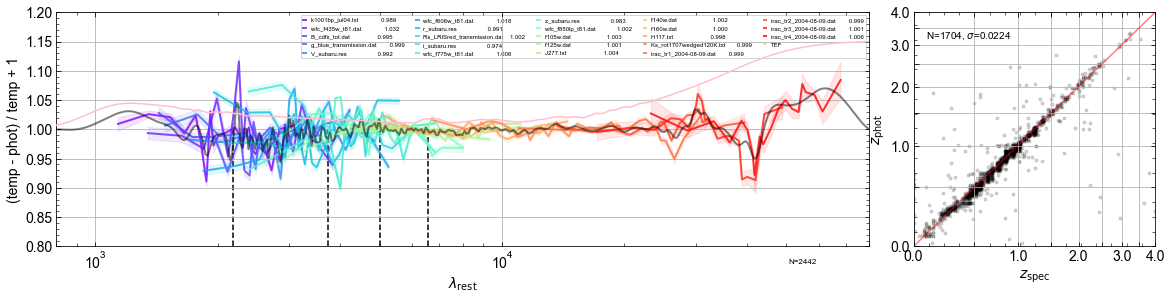

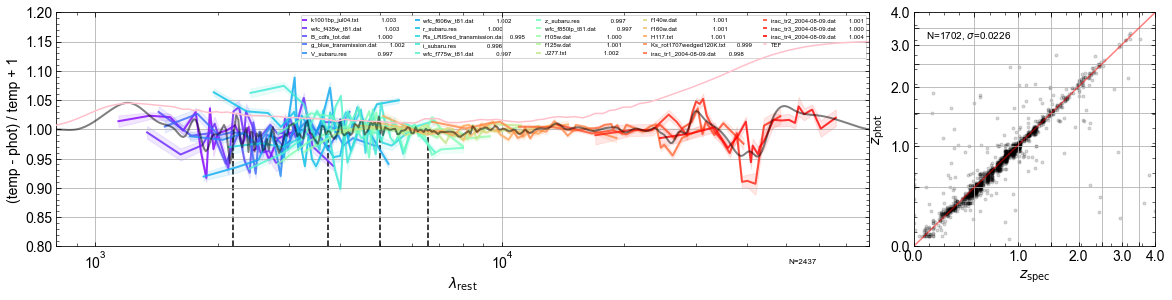

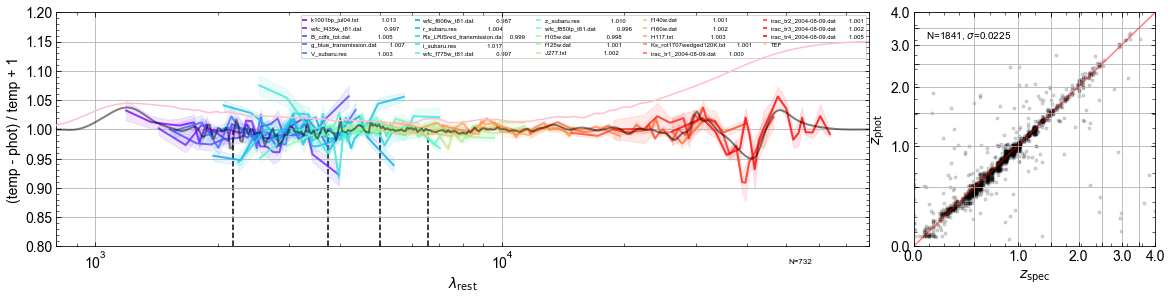

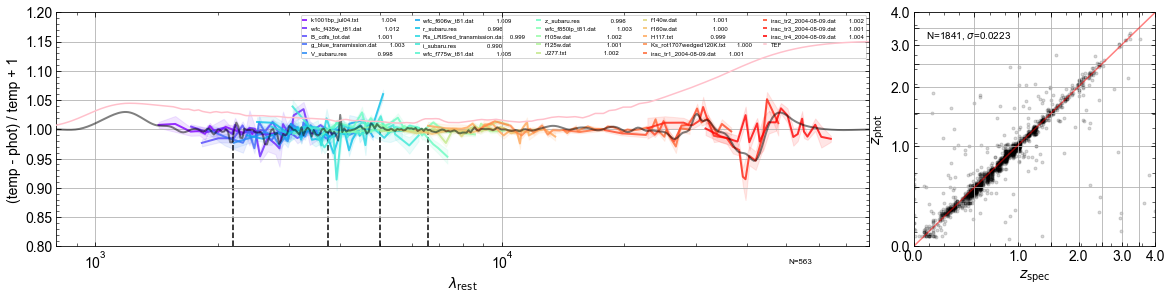

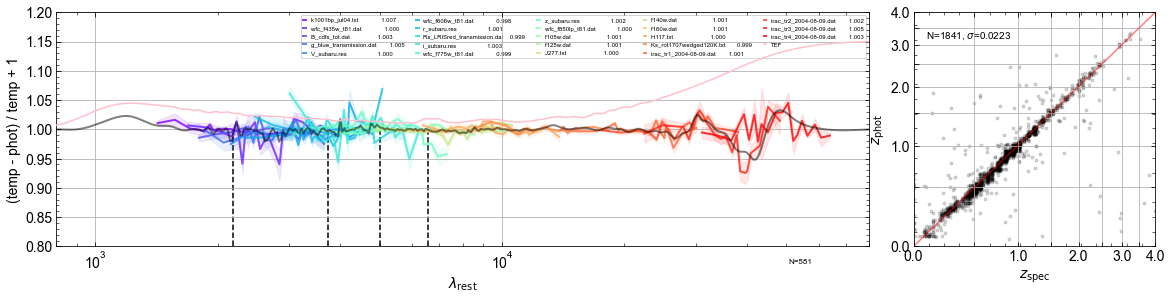

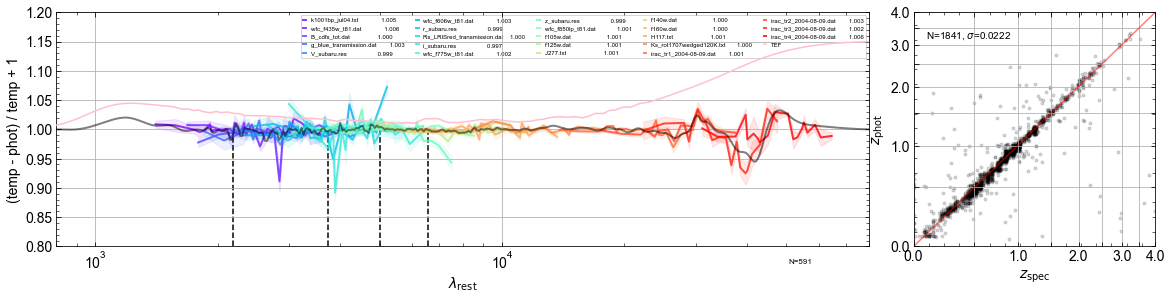

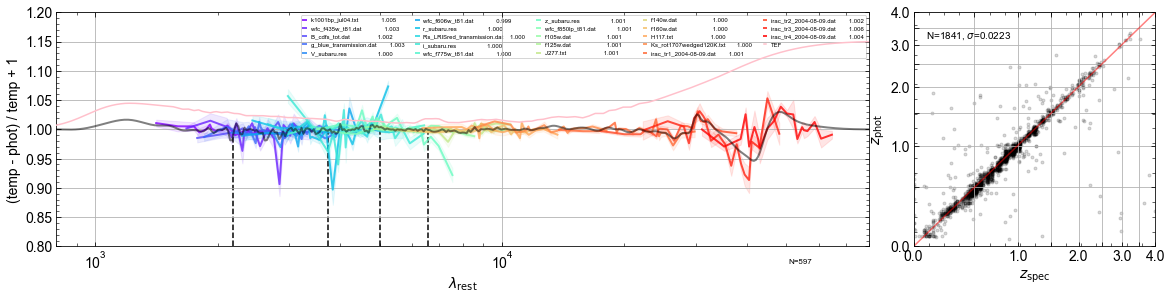

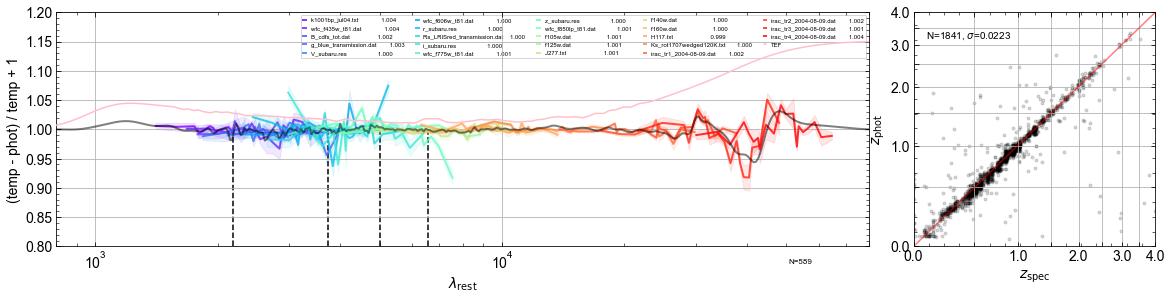

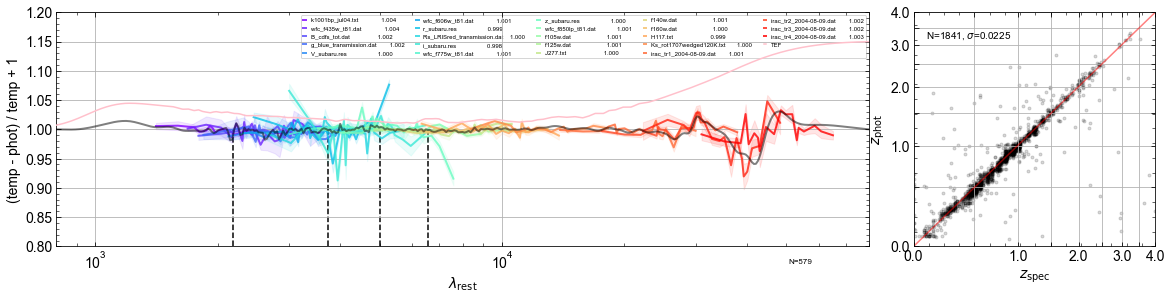

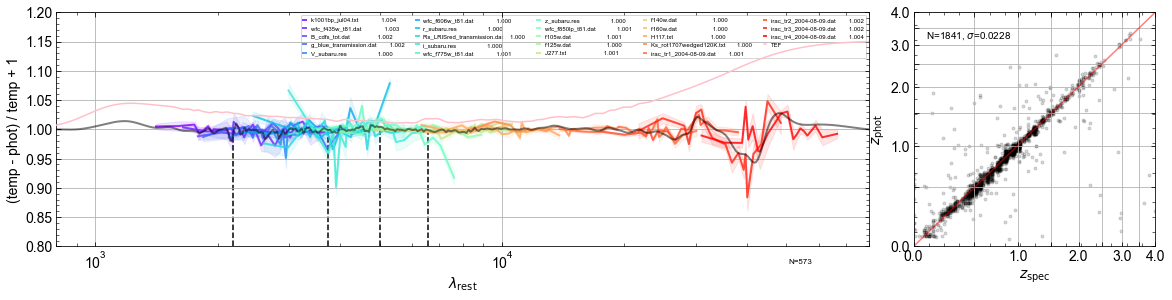

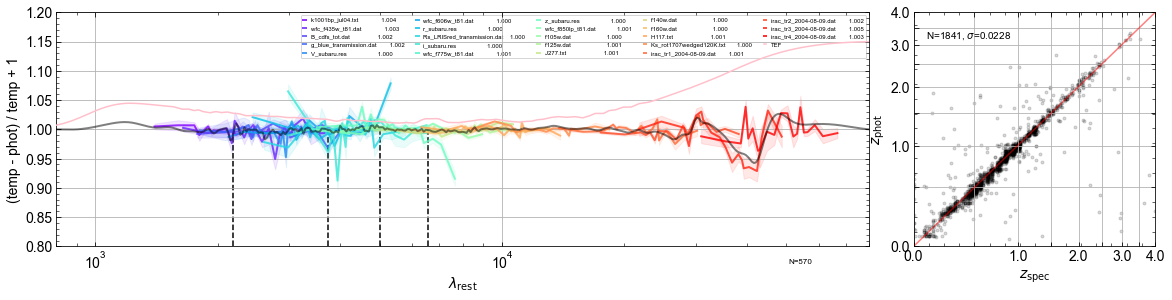

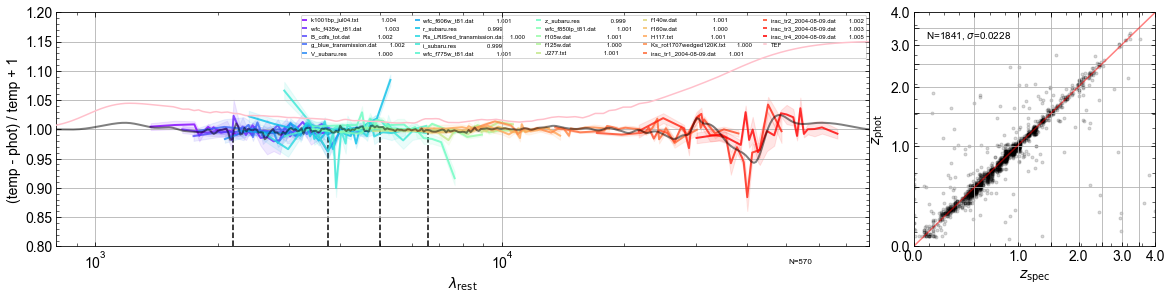

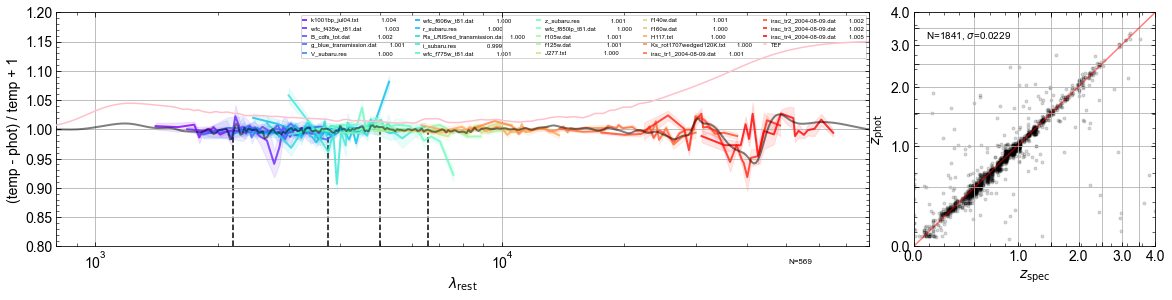

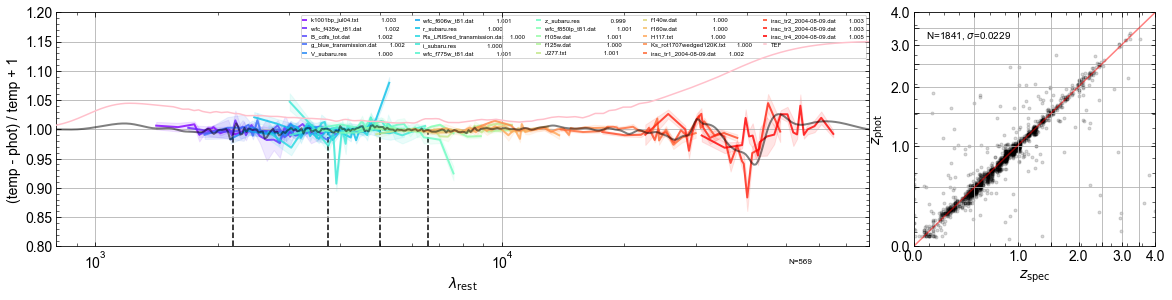

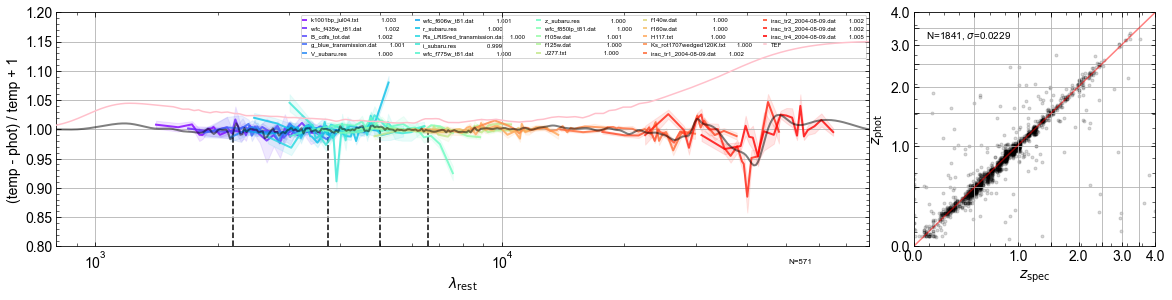

In [21]:
NITER = 15
NBIN = np.minimum(self.NOBJ//100, 180)

self.param.params['VERBOSITY'] = 1.
for iter in range(NITER):
    print('Iteration: ', iter)
    sn = self.fnu/self.efnu
    clip = (sn > 20).sum(axis=1) > 15 # Generally make this higher to ensure reasonable fits
#     clip = sn.T[-3] > 20
    
    print(len(np.where(clip == True)[0]))
    self.iterate_zp_templates(idx=self.idx[clip], update_templates=False, 
                              update_zeropoints=True, iter=iter, n_proc=8, 
                              save_templates=False, error_residuals=(iter > 0), 
                              NBIN=NBIN, get_spatial_offset=False)
    


Compute best fits
Fit 718.6 s (n_proc=8, NOBJ=50507)


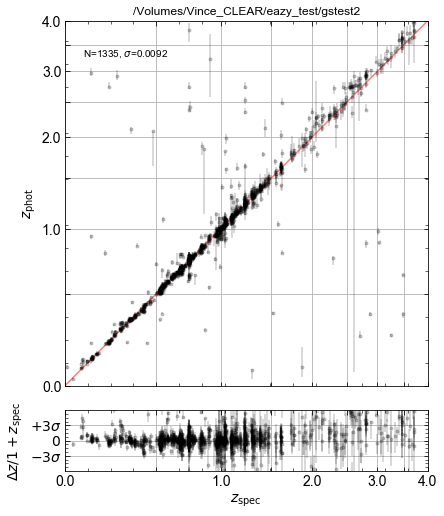

In [30]:

# Turn off error corrections derived above
self.efnu = self.efnu_orig*1

# Full catalog
sample = np.isfinite(self.cat['z_spec'])
self.fit_parallel(self.idx[sample], n_proc=8)
# Show zspec-zphot comparison
fig = self.zphot_zspec()


In [31]:
zout, hdu = self.standard_output(rf_pad_width=0.5, rf_max_err=2, prior=True, beta_prior=True)


Get best fit coeffs & best redshifts
Get parameters (UBVJ=[153, 154, 155, 161], LIR=[8, 1000])
Rest-frame filters: [153, 154, 155, 161]


/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/eazy/photoz.py:2280: RuntimeWarning: covariance is not positive-semidefinite.
  coeffs_draw[:, ok_temp] = np.random.multivariate_normal(coeffs_i[ok_temp], covar, size=get_err)


Rest-frame filters: [270, 274, 120, 121, 156, 157, 158, 159, 160, 161, 162, 163]


In [60]:
self.show_fit(self.cat['id'][21555], xlim=[0.2, 3], show_components=True)

AttributeError: 'PhotoZ' object has no attribute 'zbest'

In [6]:
fnu_i = np.squeeze(self.fnu[21155, :])*self.ext_redden*self.zp
efnu_i = np.squeeze(self.efnu[21155,:])*self.ext_redden*self.zp

fnu_factor = 10**(-0.4*(self.param['PRIOR_ABZP']+48.6))
flam_sed = 3.e18/self.lc**2/self.ext_corr


In [79]:
from spec_exam import Gen_spec

In [172]:
Gs = Gen_spec('GND', 21156, 1.253,
               g102_lims=[8300, 11500], g141_lims=[11100, 16500], mdl_err = True,
            phot_errterm = 0.03, decontam = True) 

cleaned


<ErrorbarContainer object of 3 artists>

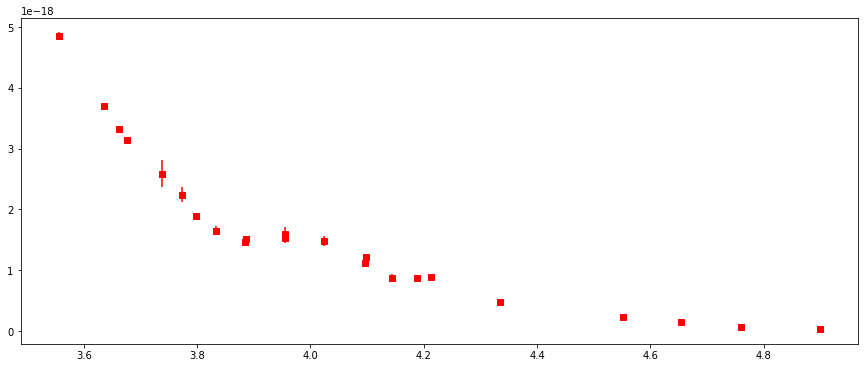

In [12]:
plt.figure(figsize = [15,6])

# plt.errorbar(np.log10(self.lc), (fnu_i*fnu_factor*flam_sed), (efnu_i*fnu_factor*flam_sed), color='k', marker='s', 
#              linestyle='None', label=None, zorder=10)
plt.errorbar(np.log10(pwv)[pfl > 0], pfl[pfl > 0], per[pfl > 0], color='r', marker='s', 
             linestyle='None', label=None, zorder=10)
# plt.errorbar(np.log10(Gs.Pwv)[Gs.Pflx > 0],Gs.Pflx[Gs.Pflx > 0],Gs.Perr[Gs.Pflx > 0],
#                                  linestyle='None', marker='p', color='#984ea3')

In [99]:
self.f_numbers

array([205, 227, 233, 229, 236, 231, 238, 240, 203, 224, 204, 225, 226,
        18,  19,  20,  21,  46, 115, 116, 117, 118, 202])

In [100]:
Gs.Pnum

array([205., 227., 233.,  46., 229., 115., 236., 116., 231., 117., 238.,
       118., 240., 203., 224., 204., 225., 226.,  18.,  19.,  20.,  21.,
       202.])

In [22]:
fnu_i = np.squeeze(self.fnu)*self.ext_redden*self.zp
efnu_i = np.squeeze(self.efnu)*self.ext_redden*self.zp

fnu_factor = 10**(-0.4*(self.param['PRIOR_ABZP']+48.6))
flam_sed = 3.e18/self.lc**2/self.ext_corr

nwv=self.lc
nfl=fnu_i*fnu_factor*flam_sed
ner=efnu_i*fnu_factor*flam_sed

In [7]:
def extract_phot(catalog, idx):

    Pwv = []
    Pfl = []
    Per = []
    Pnum = []
    
    for ii in range(len(catalog.f_numbers)):
        Pwv.append(nwv[ii])
        Pfl.append(nfl[idx - 1][ii])            
        Per.append(ner[idx - 1][ii])            
        Pnum.append(catalog.f_numbers[ii])
                
    return np.array([Pwv,Pfl,Per,Pnum])

In [23]:
pwv,pfl,per,pnum = extract_phot(self, 21156)

<ErrorbarContainer object of 3 artists>

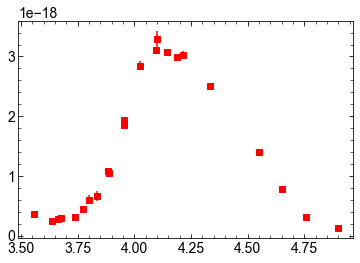

In [24]:
plt.errorbar(np.log10(pwv)[pfl > 0], pfl[pfl > 0], per[pfl > 0], color='r', marker='s', 
             linestyle='None', label=None, zorder=10)

In [12]:
np.save('/Users/vestrada/Github/Cluster_and_field/Casey_data/phot/GND_45068_phot.npy', [pwv,pfl,per,pnum])

In [25]:
os.chdir('/Users/Vince.ec/Github/Cluster_and_field/scripts')
# GS_samp = pd.read_pickle('../dataframes/galaxy_frames/GS_cnd.pkl')
G_new = np.load('../dataframes/N_GND.npy')


In [26]:
# G_new.id.values
Gid = G_new

In [27]:
# for i in range(len(G_new.id.values)):
#     print(G_new.id.values[i])
#     pwv,pfl,per,pnum = extract_phot(self, G_new.id.values[i])
#     np.save('../phot/GND_{0}_phot.npy'.format(G_new.id.values[i]), [pwv,pfl,per,pnum])

for i in range(len(Gid)):
    print(Gid[i])
    pwv,pfl,per,pnum = extract_phot(self, Gid[i])
    np.save('../phot/GND_{}_phot'.format(Gid[i]), [pwv,pfl,per,pnum],)

8140
9030
9128
9458
10272
10517
10529
10657
10793
11115
11344
11630
11759
11768
12300
12343
12460
12464
12543
12568
12573
12613
12748
12814
12994
13171
13209
13214
13344
13639
13640
13674
13750
13970
14039
14098
14140
14322
14516
14533
14560
14709
14754
14797
15127
15379
15470
16076
16173
16454
16484
16628
16752
16987
17107
17358
17540
17553
18043
18145
18232
18608
18629
18650
18704
18815
18939
18988
19011
19554
19558
19711
19725
19815
19913
19939
19955
20044
20052
20166
20216
20350
20356
20466
20496
20513
20549
20699
20702
20751
20754
20792
20795
20815
20856
20924
20966
20967
20974
21048
21104
21298
21446
21481
21507
21522
21618
21690
21732
21845
21898
22098
22184
22289
22291
22378
22386
22388
22406
22457
22465
22535
22601
22683
22702
22705
22944
23082
23178
23213
23312
23381
23543
23618
23626
23682
23744
23767
23889
23936
23950
23984
24041
24072
24089
24119
24622
24825
24928
25017
25284
25591
25688
25738
26544
26794
26822
26842
26859
26937
27158
27317
27440
27567
27660
27740
27744
27

In [20]:
temps, rflc, f_rc = EZrun.rest_frame_fluxes()

Rest-frame filters:
~~~~~~~~~~~~~~~~~~~ 
   0 REST_FRAME/maiz-apellaniz_Johnson_U.res 2006AJ....131.1184M lambda_c= 3.5900e+03 AB-Vega= 0.769 w95=862.3
   1 REST_FRAME/maiz-apellaniz_Johnson_B.res 2006AJ....131.1184M lambda_c= 4.3722e+03 AB-Vega=-0.106 w95=1321.3
   2 REST_FRAME/maiz-apellaniz_Johnson_V.res 2006AJ....131.1184M lambda_c= 5.4794e+03 AB-Vega= 0.002 w95=1369.1
   3 2MASS/J.res lambda_c= 1.2358e+04 AB-Vega= 0.885 w95=2311.1


 25%|██▌       | 1/4 [02:51<08:34, 171.64s/it]/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/eazy/photoz.py:5657: RuntimeWarning: covariance is not positive-semidefinite.
  size=ndraws)
100%|██████████| 4/4 [05:29<00:00, 82.26s/it] 

 ... rest-frame flux: 329.3 s (n_proc=2,  NOBJ=35817)


In [21]:
def Color(band1, band2):
    m1=-2.5*np.log10(band1)
    m2=-2.5*np.log10(band2)
    return m1-m2

nU = []
nV = []
nJ = []

UV = []
VJ = []

for i in range(len(f_rc)): 
    nU.append(f_rc[i][0][2])
    nV.append(f_rc[i][2][2])
    nJ.append(f_rc[i][3][2])
    
    UV.append(Color(f_rc[i][0][2], f_rc[i][2][2]))
    VJ.append(Color(f_rc[i][2][2], f_rc[i][3][2]))    

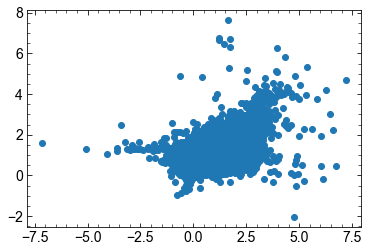

In [22]:
plt.scatter(VJ,UV)

In [13]:
Adb['nU'] = np.repeat(-99, len(Adb))
Adb['nV'] = np.repeat(-99, len(Adb))
Adb['nJ'] = np.repeat(-99, len(Adb))

Adb['nUV'] = np.repeat(-99, len(Adb))
Adb['nVJ'] = np.repeat(-99, len(Adb))

In [23]:
for i in Adb.query('field == "GND"').index:
    Adb.nU[i] = nU[Adb.id[i]-1]
    Adb.nV[i] = nV[Adb.id[i]-1]
    Adb.nJ[i] = nJ[Adb.id[i]-1]
    
    
    Adb.nUV[i] = UV[Adb.id[i]-1]
    Adb.nVJ[i] = VJ[Adb.id[i]-1]

/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Vince.ec/miniconda3/envs/astroconda3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [65]:
Adb

,AGN,Av,Av_hdr,Av_modality,Ra,Ra_f125,Ra_f125_sig,Ra_f160,Ra_f160_sig,Ra_nsig,...,Ha_EW_sig,scl_tq,sf_prob_LM,sf_prob_HM,sf_prob_cont_all,sf_prob_cont,sf_prob_ml,Sigma1_err,nUV,nVJ
2,-,0.454612,"[0.41118994718654833, 0.5034610756904888]",[0.0],0.397230,0.397230,0.003723,0.365946,0.002816,0.024123,...,3.346676,0.325960,0.065674,0.609410,"[0.09886446624226194, 0.09990276661403907, 0.0...",0.267800,0.123312,3.665679e+08,1.884432,1.326882
4,-,0.382130,"[0.2877833692593465, 0.476477274932741]",[0.3592797931879877],1.075130,1.051720,0.015512,1.075130,0.010293,0.065324,...,20.873370,0.349882,0.000247,0.078294,"[0.0002573550024348952, 0.00018208627048852698...",0.004366,0.007053,3.946862e+08,1.912182,1.232070
6,-,0.001853,"[0.0018531709332725663, 0.1381981823388379]",[0.3668836221896201],0.107238,0.107238,0.002810,0.105360,0.002177,0.007021,...,0.000000,0.353186,0.000744,0.041110,"[6.319746235965718e-05, 7.176182859804464e-05,...",0.000821,0.000872,3.590607e+08,1.000000,1.000000
7,-,0.027726,"[0.0043117515313868555, 0.1437794801037624]",[0.0],0.168264,0.168264,0.001654,0.172866,0.001620,0.010230,...,-99.000000,0.280089,0.000729,0.009243,"[7.223806649946984e-06, 1.2013320962278436e-05...",0.000087,0.000009,4.768355e+08,1.840346,1.178111
10,-,0.036295,"[0.016803984115102012, 0.08158322099994794]",[0.0],0.169464,0.169464,0.001391,0.148542,0.001135,0.010262,...,0.000000,0.316754,0.000406,0.019294,"[3.4461662439020153e-06, 4.713853655110476e-06...",0.000221,0.000023,4.174929e+08,1.684628,1.000523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,NaN,1.936949,"[1.8127140428557915, 2.0375950742558038]",[0.0],0.166692,0.166692,0.002914,0.131898,0.002118,NaN,...,12.041403,0.388969,NaN,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,1.000000,3.058938e+08,1.299324,1.751920
1418,NaN,1.230544,"[1.1119593221871953, 1.3429944172802375]",[0.0],1.528220,1.528220,0.038355,1.285710,0.018447,NaN,...,25.140283,0.322571,NaN,NaN,"[0.6887100737010395, 0.6887509304136031, 0.702...",0.690859,0.410946,4.097548e+08,1.940466,1.678730
1420,NaN,0.559260,"[0.418450647858396, 0.6894021006902561]",[0.0],0.469308,0.469308,0.006215,0.457806,0.006454,NaN,...,16.286860,0.423536,NaN,NaN,"[0.9937499309592794, 0.9961134674575851, 0.990...",0.994825,1.000000,1.012530e+08,0.885389,0.906704
1433,NaN,1.741601,"[1.5161709867221105, 1.9333851561524353]",[0.0],0.614112,0.776850,0.055643,0.614112,0.027969,NaN,...,0.000000,0.385205,NaN,NaN,"[0.7096830259319835, 0.7215907525602211, 0.686...",0.834302,0.860053,3.064303e+08,2.057641,1.912516


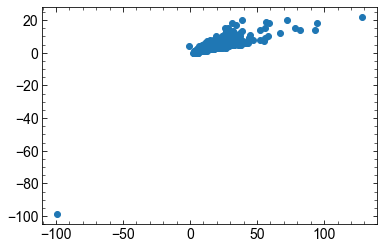

In [25]:
plt.scatter(Adb.nV, Adb.nU)

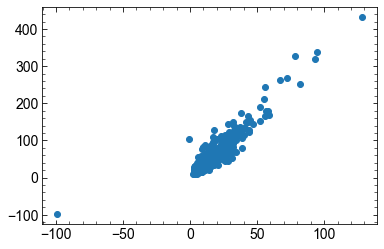

In [26]:
plt.scatter(Adb.nV, Adb.nJ)

In [27]:
Adb.to_pickle('/Users/Vince.ec/GitHub/Cluster_and_field/dataframes/fitdb/evolution_db_masslim.pkl')
